In [83]:
%reset -f

## Assignment E - Brightfield histology color deconvolution
- Author: Catherine Chia and Aoming Sun
- Teacher and TAs: Marten Postma, Aaron Lin, Aoming Sun, Catherine Chia
- Date: 21st June, 2023

### Outline of workflow
1. Prerequisites: 
- Use ImageJ to crop and export images: Stain 1, Stain 2, Background, __OR__ 
- Use ImageJ to export the RGB vectors for the same images

2. Preprocessing

3. Color Deconvolution

4. Separate stains

In [84]:
#Libraries
from matplotlib import pyplot as plt, patches
import numpy as np

#Enable nice output printing features
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'
import warnings
warnings.filterwarnings('ignore')

#Add other libraries as you see fit
import glob
from skimage import io

### __Preprocessing steps__

In [85]:
#Start coding here

#Import IHC image and split it to RGB
img_ihc = io.imread('IPQDA_23_ASS_E_DATA/H_E.tif')
img_ihc_red = img_ihc[:, :, 0]
img_ihc_green = img_ihc[:, :, 1]
img_ihc_blue = img_ihc[:, :, 2]

#Import cropped stain1, stain2 and background ROI images, OR import RGB vectors of the ROIs
img_eosin = io.imread('IPQDA_23_ASS_E_DATA/eosin.tif')
img_hematoxylin = io.imread('IPQDA_23_ASS_E_DATA/hematoxylin.tif')
img_background = io.imread('IPQDA_23_ASS_E_DATA/background.tif')

#End coding here

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


array([[[255, 245, 254],
        [255, 245, 254],
        [254, 244, 253],
        ...,
        [250, 243, 251],
        [252, 242, 251],
        [253, 243, 252]],

       [[255, 245, 254],
        [255, 246, 255],
        [254, 244, 253],
        ...,
        [255, 248, 255],
        [255, 246, 255],
        [255, 247, 255]],

       [[254, 244, 253],
        [254, 244, 253],
        [254, 244, 253],
        ...,
        [255, 249, 255],
        [255, 248, 255],
        [255, 248, 255]],

       ...,

       [[248, 241, 249],
        [249, 242, 250],
        [252, 245, 253],
        ...,
        [254, 247, 254],
        [252, 245, 252],
        [252, 245, 252]],

       [[250, 243, 251],
        [250, 243, 251],
        [251, 244, 252],
        ...,
        [252, 245, 252],
        [249, 242, 249],
        [248, 241, 248]],

       [[255, 248, 255],
        [252, 245, 253],
        [249, 242, 250],
        ...,
        [255, 248, 255],
        [255, 248, 255],
        [253, 246, 253]]

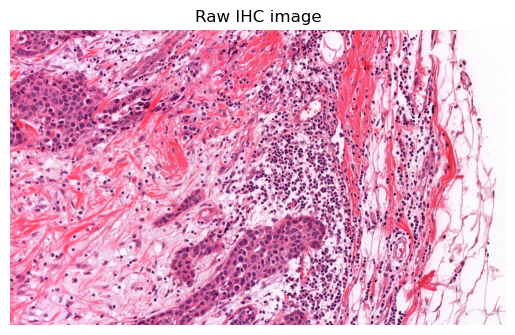

In [86]:
#Inspect imported IHC image
plt.title("Raw IHC image")
plt.axis('off')
plt.imshow(img_ihc)

### Calculate RGB mean of the images

In [87]:
#Start coding here

#Calculate mean of image for each RGB channels. If you use RGB vectors, assign them directly to the variables here
mean_img_stain1 = np.mean(img_eosin, axis=(0, 1))
mean_img_stain2 = np.mean(img_hematoxylin, axis=(0, 1))
mean_img_background = np.mean(img_background, axis=(0, 1))

#End coding here

print(mean_img_stain1)
print(mean_img_stain2)
print(mean_img_background)

[57.29166667  8.33333333 60.44444444]
[253.54347826  62.04891304  94.0923913 ]
[252.54678363 245.39181287 252.87426901]


### Inspect ROIs of stains and background to ensure correct stain color selection

#39083c
#fd3e5e
#fcf5fc


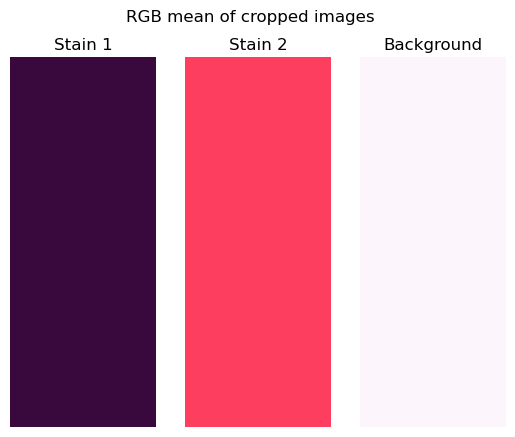

In [88]:
#Convert RGB values to Hex color values for visualization
hex_img_stain1 = '#%02x%02x%02x' % tuple(mean_img_stain1.astype(int))
hex_img_stain2 = '#%02x%02x%02x' % tuple(mean_img_stain2.astype(int))
hex_img_background = '#%02x%02x%02x' % tuple(mean_img_background.astype(int))

print(hex_img_stain1)
print(hex_img_stain2)
print(hex_img_background)

#Visualization of RGB mean of cropped images
fig, axs = plt.subplots(1,3)

fig.suptitle('RGB mean of cropped images')

rectangle_stain1 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain1)
rectangle_stain2 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain2)
rectangle_background = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_background)

axs[0].add_patch(rectangle_stain1)
axs[1].add_patch(rectangle_stain2)
axs[2].add_patch(rectangle_background)
axs[0].set_title('Stain 1')
axs[1].set_title('Stain 2')
axs[2].set_title('Background')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

### __Color Deconvolution__

### Calculate transmittance, T and convert it to absorbances, OD according to Beer–Lambert law  

In [89]:
#Calculate transmittances, T for each stain
T_stain1 = mean_img_background / mean_img_stain1
T_stain2 = mean_img_background / mean_img_stain2
OD_stain1 = -np.log10(T_stain1)
OD_stain2 = -np.log10(T_stain2)

print(OD_stain1)
print(OD_stain2)

[-0.64425039 -1.46904132 -0.62154825]
[ 0.0017106  -0.59712589 -0.42935013]


### Normalize the absorbances to vector lengths

In [90]:
#Start coding here

# Normalize the absorbances
OD_stain1_norm = OD_stain1 / np.max(OD_stain1)
OD_stain2_norm = OD_stain2 / np.max(OD_stain2)

#End coding here

print(OD_stain1_norm)
print(OD_stain2_norm)

[1.03652514 2.36351935 1.        ]
[   1.         -349.07351088 -250.99356944]


### Form a deconvolution matrix

In [91]:
#Start coding here

#Combine OD_stain1_norm and OD_stain2_norm to form a normalized OD matrix M
M = np.column_stack((OD_stain1_norm, OD_stain2_norm))

#Calculate the deconvolution matrix according to Linear regression
MT = np.linalg.pinv(M)
MT_M = np.dot(MT, M)
inversed_MT_M = np.linalg.inv(MT_M)
D = np.dot(inversed_MT_M, MT)

#End coding here

print("M")
print(M)
print("M transposed")
print(MT)
print("Inversed M transposed multiplied with M")
print(inversed_MT_M)
print("Deconvolution matrix, D")
print(D)

M
[[   1.03652514    1.        ]
 [   2.36351935 -349.07351088]
 [   1.         -250.99356944]]
M transposed
[[ 7.39791469e-01  2.36689261e-01 -3.26232102e-01]
 [ 4.30765720e-03 -5.11940630e-04 -3.25501339e-03]]
Inversed M transposed multiplied with M
[[1.00000000e+00 4.26325641e-14]
 [3.03576608e-18 1.00000000e+00]]
Deconvolution matrix, D
[[ 7.39791469e-01  2.36689261e-01 -3.26232102e-01]
 [ 4.30765720e-03 -5.11940630e-04 -3.25501339e-03]]


### Calculate the coefficient for each stain 

In [92]:
#Convert pixel intensity to transmittance to absorbance according to Beer-Lambert Law on the IHC image
#Calculate the transmittance
T_img_ihc = mean_img_background / img_ihc


#Because of the logarithmic function in the next step, we assign all transmittance value less than 1 to 1 
T_img_ihc[T_img_ihc<1] = 1

In [93]:
#Start coding here

#Calculate the absorbance
OD_img_ihc = -np.log10(T_img_ihc)

#Coefficient matrix
coeffs = np.dot(np.reshape(OD_img_ihc, (-1, 3)), D.T)
coeff_stain1 = coeffs[:, 0]
coeff_stain2 = coeffs[:, 1]


#Extracting the individual coefficients from the coefficient matrix
#Which are essentially the orthogonal representation of the stains of the IHC image
OD_img_ihc_stain1 = np.reshape(coeff_stain1, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain1
OD_img_ihc_stain2 = np.reshape(coeff_stain2, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain2


#End coding here

print(coeff_stain1.shape)
print(coeff_stain2.shape)

(8951993,)
(8951993,)


### __Separate stains__

### Multiply the coefficients with the stain absorbance to get the image absorbance per stain

In [94]:
#Initialize the image absorbance container per stain
OD_img_ihc_stain1 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))
OD_img_ihc_stain2 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))


#Start coding here

#Multiply the coefficients with the stain absorbance per stain. Do it independently for each RGB layer
OD_img_ihc_stain1 = np.reshape(coeff_stain1, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain1
OD_img_ihc_stain2 = np.reshape(coeff_stain2, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain2


#End coding here

array([[[ 1.71757563e-06, -5.99560155e-04, -4.31100438e-04],
        [ 1.63848650e-06, -5.71952236e-04, -4.11249576e-04],
        [ 1.55360138e-06, -5.42321089e-04, -3.89943956e-04],
        ...,
        [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [-7.92683156e-09,  2.76704692e-06,  1.98958375e-06],
        [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00]],

       [[ 1.49389192e-06, -5.21478097e-04, -3.74957265e-04],
        [ 1.35520845e-06, -4.73067373e-04, -3.40148607e-04],
        [ 1.29905062e-06, -4.53464160e-04, -3.26053351e-04],
        ...,
        [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [-1.12856694e-08,  3.93952824e-06,  2.83263045e-06],
        [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00]],

       [[ 1.39128099e-06, -4.85659341e-04, -3.49202583e-04],
        [ 1.21567154e-06, -4.24358733e-04, -3.05125739e-04],
        [ 1.15930758e-06, -4.04683567e-04, -2.90978747e-04],
        ...,
        [ 0.00000000e+00, -0.00000000e+00,

### Convert the image absorbance to image transmittance  

In [95]:
#Convert absorbance to transmittance
T_img_ihc_stain1 = 10 ** (-OD_img_ihc_stain1)
T_img_ihc_stain2 = 10 ** (-OD_img_ihc_stain2)

array([[[0.99999605, 1.00138149, 1.00099314],
        [0.99999623, 1.00131784, 1.00094739],
        [0.99999642, 1.00124952, 1.00089828],
        ...,
        [1.        , 1.        , 1.        ],
        [1.00000002, 0.99999363, 0.99999542],
        [1.        , 1.        , 1.        ]],

       [[0.99999656, 1.00120147, 1.00086374],
        [0.99999688, 1.00108987, 1.00078353],
        [0.99999701, 1.00104469, 1.00075105],
        ...,
        [1.        , 1.        , 1.        ],
        [1.00000003, 0.99999093, 0.99999348],
        [1.        , 1.        , 1.        ]],

       [[0.9999968 , 1.0011189 , 1.00080439],
        [0.9999972 , 1.0009776 , 1.00070282],
        [0.99999733, 1.00093225, 1.00067023],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99999623, 1.00131683, 1.00094666],
        [0.99999645, 1.0012393 , 1.00089093],
        [0.99999669, 1

### Clip each layer in the image transmittance to values between 0 and 1, preparing for conversion to values between 0 and 255 later

In [96]:
#Clip each layer to 0,1
T_img_ihc_stain1[T_img_ihc_stain1 > 1] = 1
T_img_ihc_stain2[T_img_ihc_stain2 > 1] = 1
T_img_ihc_stain1[T_img_ihc_stain1 < 0] = 0
T_img_ihc_stain2[T_img_ihc_stain2 < 0] = 0

### Convert the image transmittance to values between 0 and 255 (integers), so that plotting is possible

In [97]:
#Start coding here

T_img_ihc_stain1_norm = (T_img_ihc_stain1 * 255).astype(np.uint8)

T_img_ihc_stain2_norm = (T_img_ihc_stain2 * 255).astype(np.uint8)

#End coding here


array([[[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 255],
        [255, 254, 254],
        [255, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 255],
        [255, 254, 254],
        [255, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [255, 254, 254],
        [255, 254, 254],
        [255, 254, 254]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [255, 254, 254],
        [255, 254, 254],
        [255, 254, 254]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [255, 254, 254],
        [255, 254, 254],
        [255, 254, 254]]

### Visualize deconvolved images

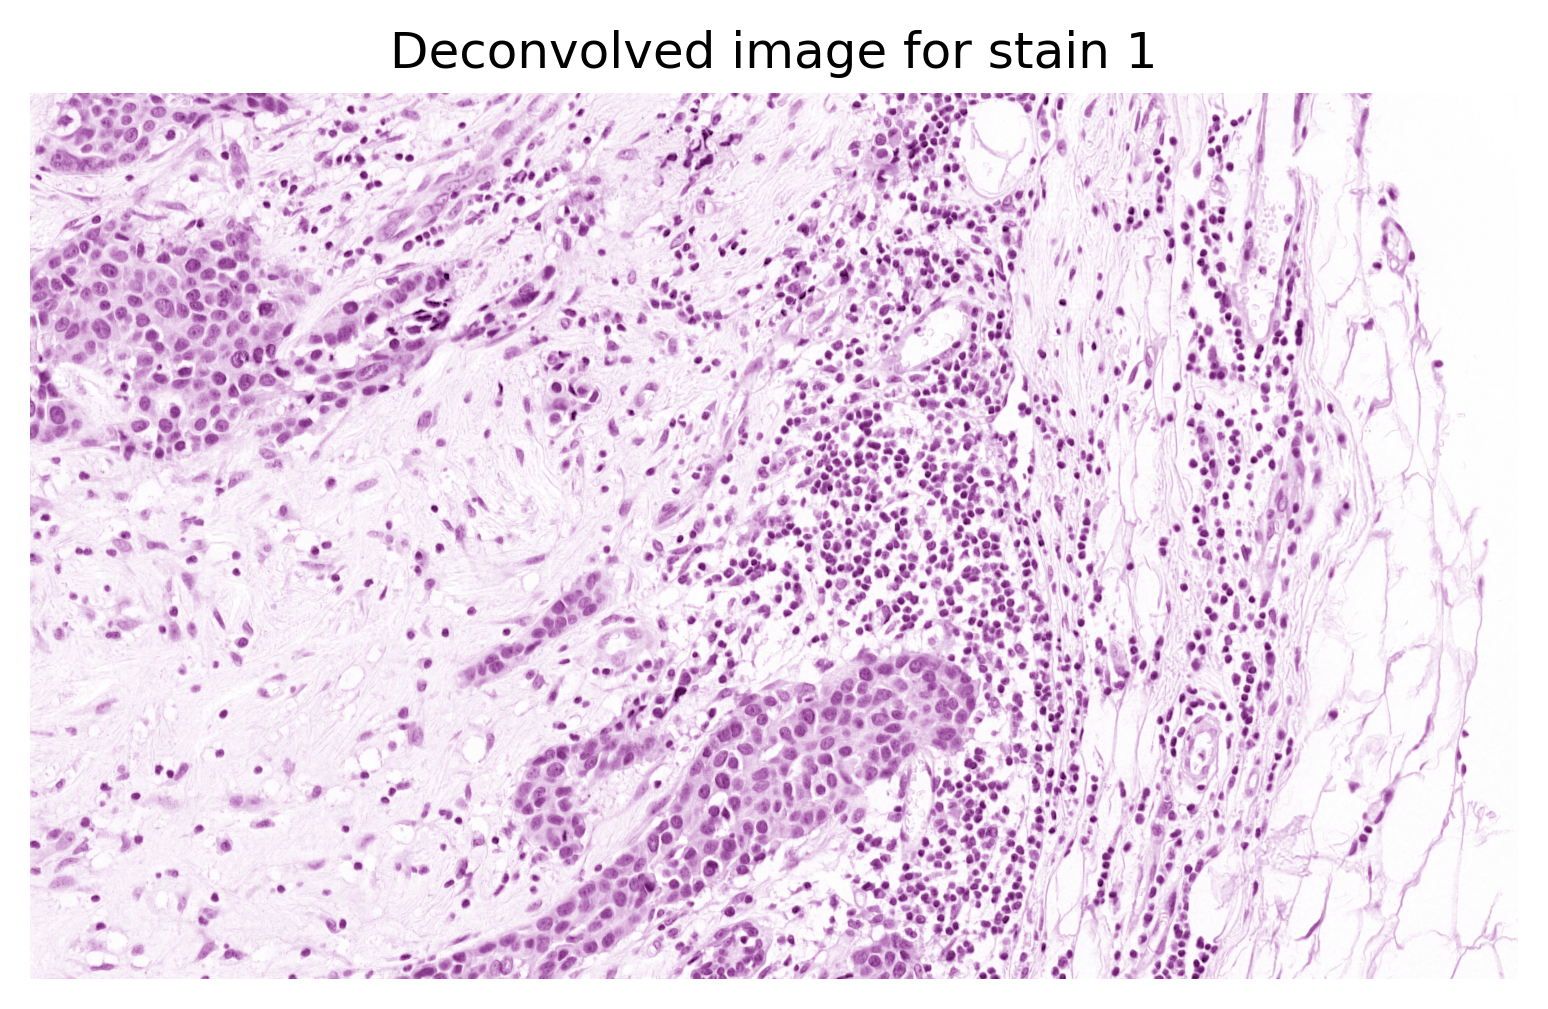

In [98]:
#Display deconvolved image for stain 1
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 1")
plt.axis('off')
plt.imshow(T_img_ihc_stain1_norm)
fig.savefig('T_img_ihc_stain1_norm.tif')

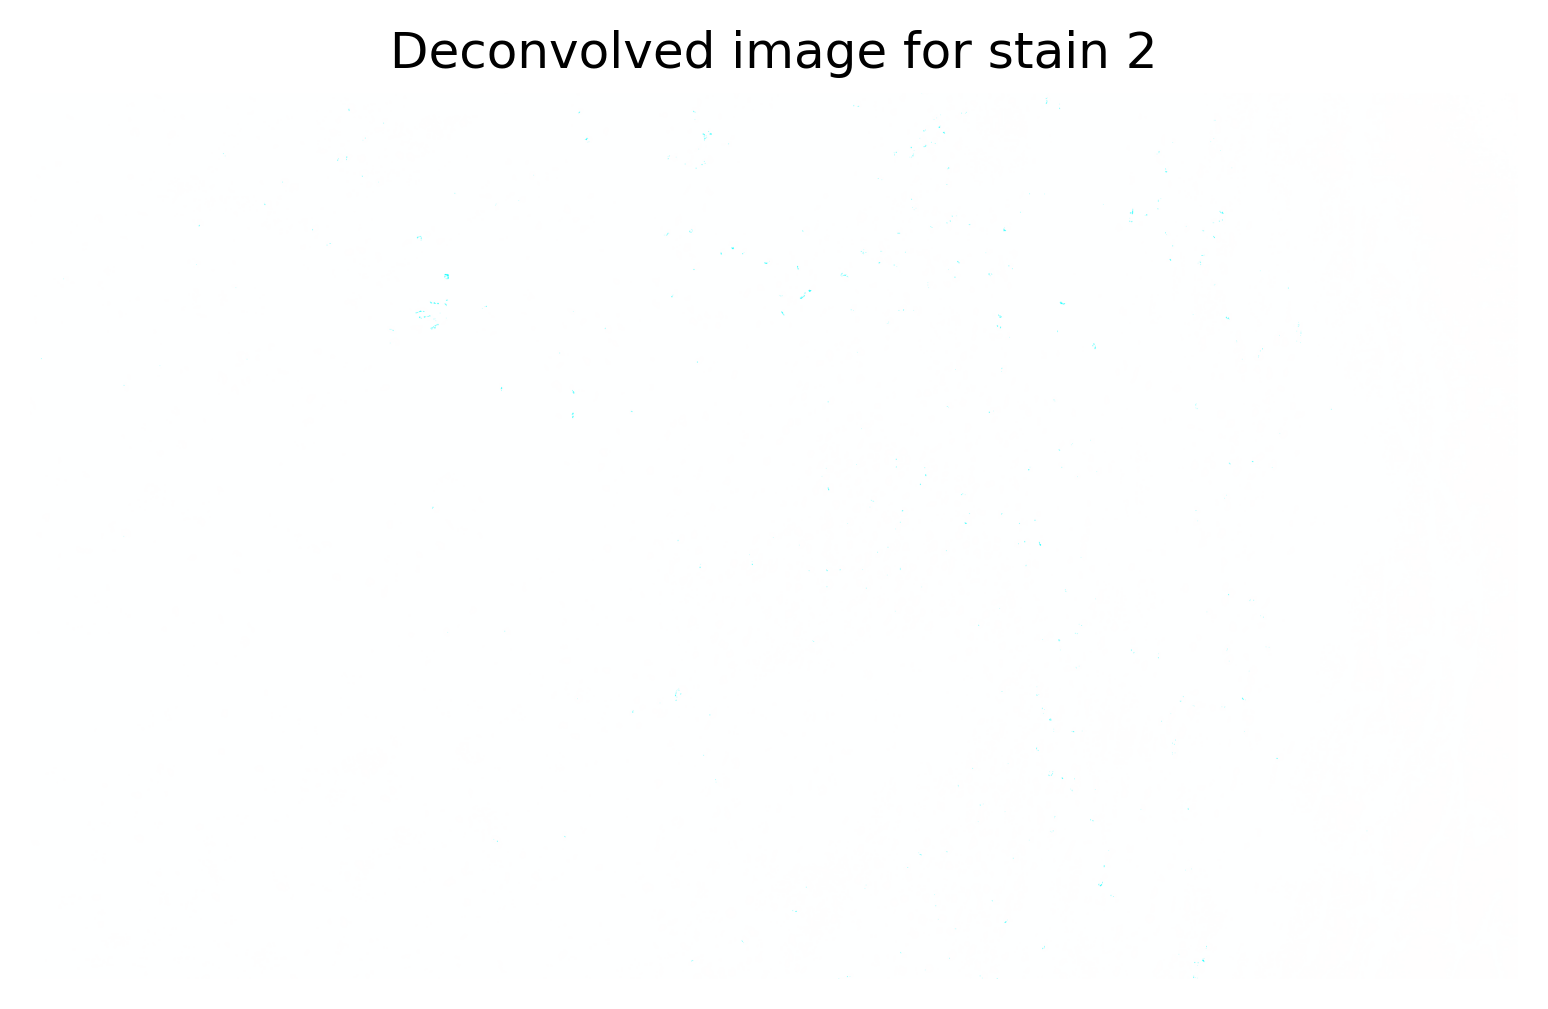

In [99]:
#Display and export deconvolved image for stain 1
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 2")
plt.axis('off')
plt.imshow(T_img_ihc_stain2_norm)
fig.savefig('T_img_ihc_stain2_norm.tif')